In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import time



In [54]:
# path = r"D:\study\moed2\3lab\p1.jpg"
# path = r"D:\study\moed2\3lab\p2.jpg"
# path = r"D:\study\moed2\3lab\p3.jpg"
# path = r"D:\study\moed2\3lab\p4.jpg"
# path = r"D:\study\moed2\3lab\p5.jpg"
# path = r'D:\study\moed2\1lab\grace.jpg'
# path = r"D:\study\moed2\2lab\c12-85v.png"
path = r"D:\study\moed2\2lab\u0.png"


img = cv.imread(path)
print(img.shape)
img = img[:,:,2]
print(img.shape)

(2048, 2500, 3)
(2048, 2500)


In [3]:
def show_picture_plot(image, title: str='window_name'):
    try:
        plt.figure(figsize=(10,10))
        plt.title(title)
        plt.imshow(image, cmap='gray')
    except Exception :
        # cv.destroyAllWindows()
        print('error')

In [4]:
def show_picture(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        cv.waitKey(0)
        cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def show_picture_not_close(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        # cv.waitKey(0)
        # cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def inverse_image(image):
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        vmax = np.max(image)

        new_image = vmax - (1) - image

        result = np.array(new_image)
        return result

In [5]:
def gray_image(image):
    mx = np.max(image)
    mn = np.min(image)
    amp = mx-mn
    img_restore_shift = (((image-mn)/amp)*255).astype('int')
    return img_restore_shift

In [6]:
def build_histogram(image):
    x_len, y_len = image.shape[0], image.shape[1]


    histogram = np.zeros(256)
    print(histogram.shape)
    for i in range(x_len):
        for e in range(y_len):
            histogram[image[i,e]]+=1
    mx = np.max(histogram)
    histogram = (histogram/mx)*255
    return histogram

def build_cdf(histogram):
    cdf = np.zeros(256)
    cdf[0] = histogram[0]
    for i in range(1, histogram.shape[0]):
        cdf[i]+=cdf[i-1]+histogram[i]
    mx = np.max(cdf)
    cdf = (cdf/mx)*255
    return cdf

def equalize(image, cdf):
    x_len, y_len = image.shape[0], image.shape[1]
    new_image = np.zeros((x_len, y_len))
    int_hist = np.array(cdf).astype('int')
    for i in range(x_len):
        for e in range(y_len):
            new_image[i,e] = int_hist[image[i,e]]

    return new_image

def build_reversed_function(func):
    n = func.shape[0]
    func = func.astype('int')
    new_func = np.zeros(n)
    for i in range(n):
        new_func[func[i]] = i
    return new_func


def remapping(image, cdf):
    # x_len, y_len = image.shape[0], image.shape[1]
    # new_image = np.zeros((x_len, y_len))
    rev_cdf = build_reversed_function(cdf)
    return equalize(image, rev_cdf)


In [47]:
img = inverse_image(img)

In [41]:
print(img[:10])

[[247 247 247 ...  83 178 255]
 [247 247 247 ...  83 178 255]
 [247 247 245 ...  83 179 255]
 ...
 [242 236 227 ...  83 179 255]
 [231 229 221 ...  82 179 255]
 [229 221 210 ...  82 180 255]]


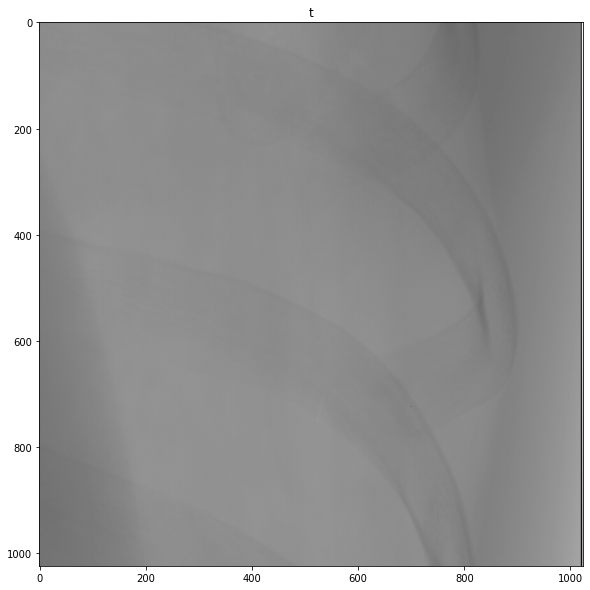

In [48]:
show_picture_plot(img, 't')

(256,)


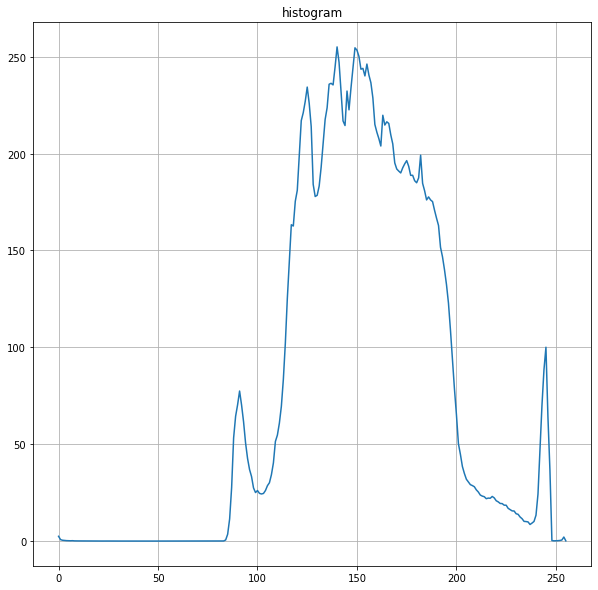

In [55]:
hist = build_histogram(img)
# print(hist)


plt.figure(figsize=(10,10))
plt.title('histogram')
plt.grid()
plt.plot(hist)


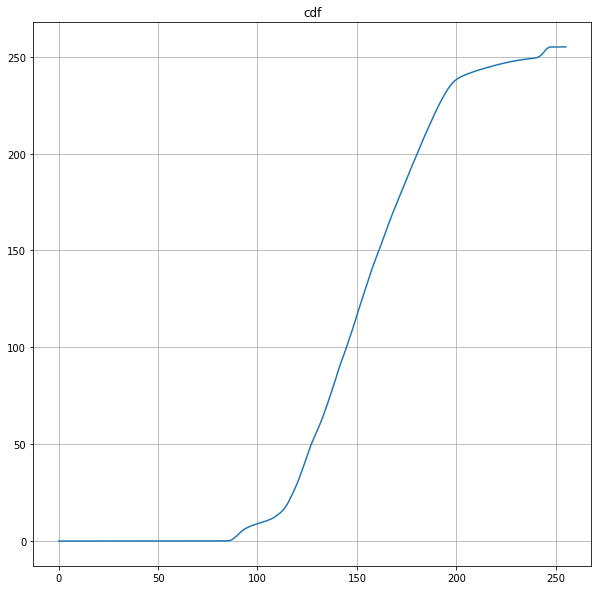

In [56]:
cdf = build_cdf(hist)

plt.figure(figsize=(10,10))
plt.title('cdf')
plt.grid()
plt.plot(cdf)

(2048, 2500)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   7.]
 [  0.   0.   0.   0.   0.   0.   0.   7.  73.]
 [  0.   0.   0.   0.   0.   0.   9.  70. 141.]]
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7]
 [  0   0   0   0   0   0   0   7  73]
 [  0   0   0   0   0   0   9  70 141]]


True

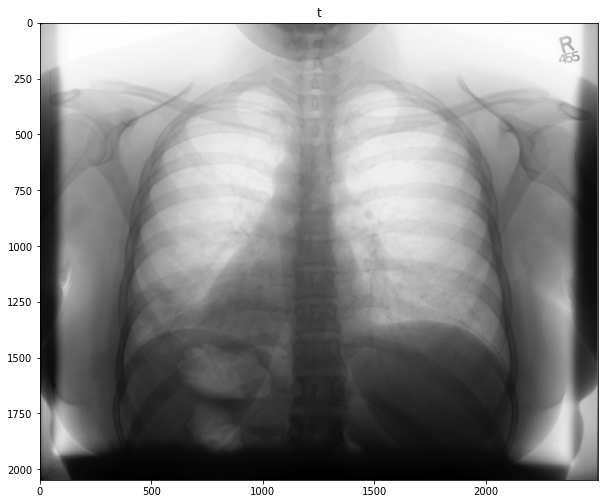

In [57]:
equalized_image = equalize(img, cdf)
print(equalized_image.shape)
print(equalized_image[:9,:9])
image_eq_gr = gray_image(equalized_image)
print(image_eq_gr[:9,:9])

show_picture_plot(image_eq_gr, 't')
cv.imwrite(path+'.jpg', image_eq_gr)

(256,)


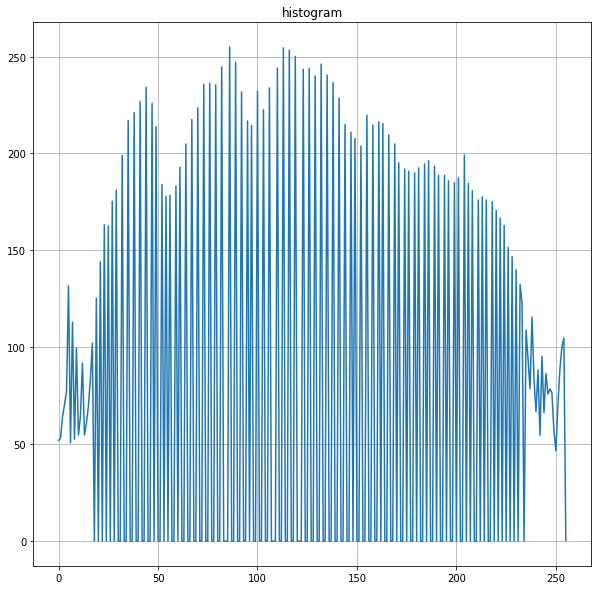

In [58]:
hist_eq = build_histogram(image_eq_gr)
# print(hist)


plt.figure(figsize=(10,10))
plt.title('histogram')
plt.grid()
plt.plot(hist_eq)

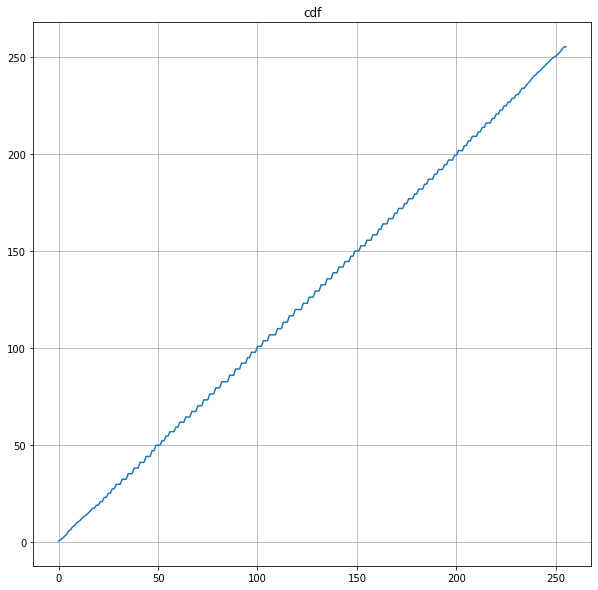

In [59]:
cdf_eq = build_cdf(hist_eq)

plt.figure(figsize=(10,10))
plt.title('cdf')
plt.grid()
plt.plot(cdf_eq)

[255.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


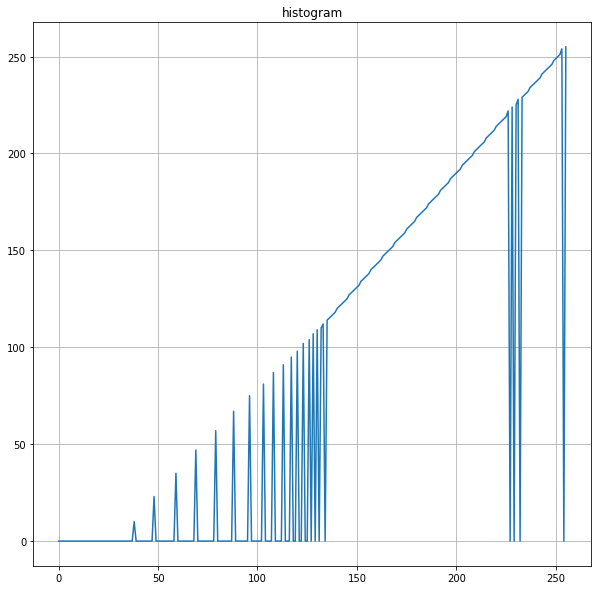

In [13]:
print(hist_eq[0:10])
rev_hist_eq = build_reversed_function(cdf_eq)

plt.figure(figsize=(10,10))
plt.title('histogram')
plt.grid()
plt.plot(rev_hist_eq)

(1024, 1024)
[[  0.   0.   0.   0.   0.   0.   0. 139.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]
[[  0   0   0   0   0   0   0 139   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]


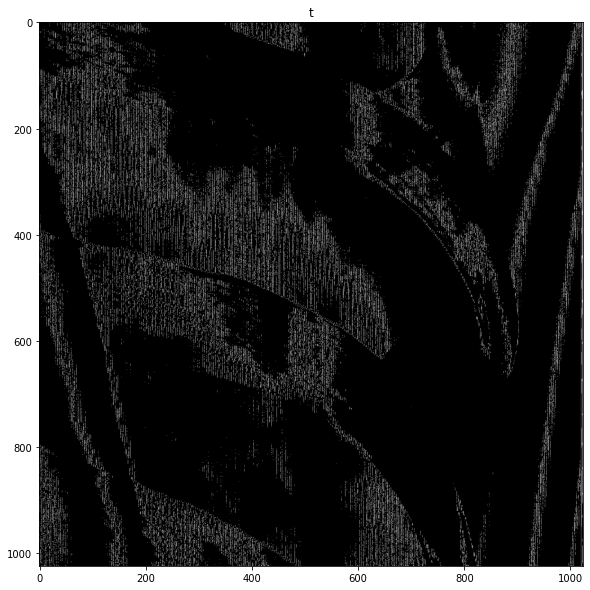

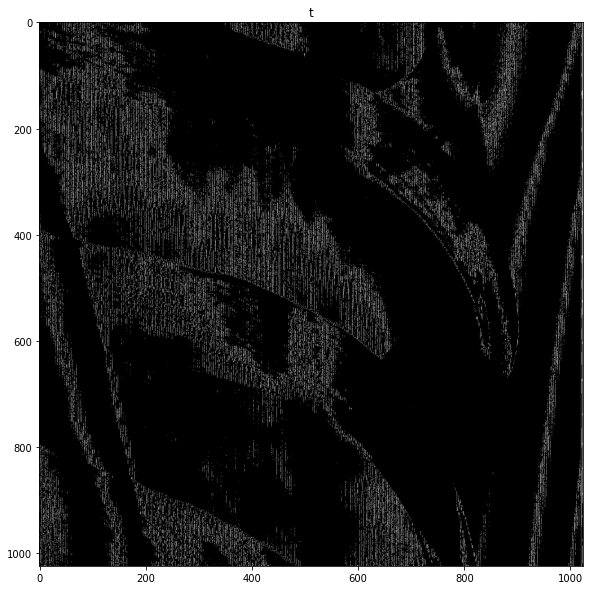

In [25]:
remapping_image = remapping(img, cdf)
print(remapping_image.shape)
print(remapping_image[:9,:9])
show_picture_plot(remapping_image, 't')
image_rem_gr = gray_image(remapping_image)
print(image_rem_gr[:9,:9])

show_picture_plot(image_rem_gr, 't')

(256,)


ERROR! Session/line number was not unique in database. History logging moved to new session 1037


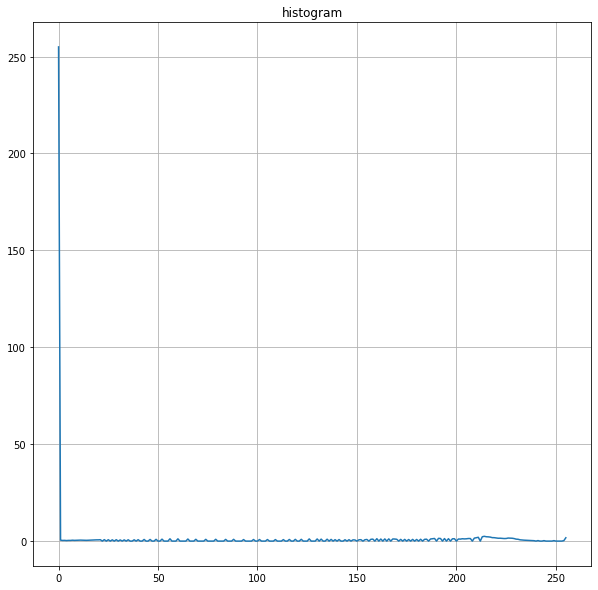

In [16]:
hist_eq = build_histogram(image_rem_gr)
# print(hist)


plt.figure(figsize=(10,10))
plt.title('histogram')
plt.grid()
plt.plot(hist_eq)

In [ ]:
cdf_eq = build_cdf(image_rem_gr)

plt.figure(figsize=(10,10))
plt.title('cdf')
plt.grid()
plt.plot(cdf_eq)